### 수치적 최적화(numerical optimization)
* 현재 위치 $x_k$가 최적점인지 판단하는 알고리즘
    - 기울기 필요조건
        - 미분값이 0 또는 모든변수에 대한 그레디언트 벡터값이 0
        - 이차도함수의 값이 양수 또는 헤시안벡터가 양의정부호
  
* 어떤 위치 $x_k$를 시도한 뒤, 다음 번에 시도할 위치 $x_{k+1}$을 찾는 알고리즘
    - 최대경사법(Steepest Gradient Descent)
    $$ 
\begin{align}
x_{k+1} = x_{k} - \mu \nabla f(x_k) = x_{k} - \mu g(x_k) 
\tag{5.1.11}
\end{align}
$$

#### 최대경사법
- 특징
    - 특정 점에서 기울기가 음수면 앞으로 진행, 양수면 뒤로 진행하여 점점 낮은 위치로 진행
    - 최적점에 도달하면 $\nabla f(x_k)$값이 0이므로 더이상 이동X
    
- 문제: 진동문제

- 해결
    - 2차도함수/ 헤시안 행렬 이용
    - 모멘텀 방법


#### 뉴턴방법
$$ 
\begin{align}
{x}_{n+1} = {x}_n - [{H}f({x}_n)]^{-1} \nabla f({x}_n) 
\tag{5.1.12}
\end{align}
$$
- 장점
    - 스텝사이즈 필요 없음(헤시안 함수)
    - 빠르게 수렴
    - 지그재그 현상 최소화
    
- 단점
    - 해시안 함수, 그레디언트 벡터 모두 알아야함
    - 함수모양에 따라 수렴 안할수도 있다
    
- 해결
    - 준뉴턴문제
        - 현재 점 주변의 몇몇 점에서 함수의 값 구하고 이를 이용해 2차 도함수 값 계산
        - ex) BFGS, CG
        

#### scipy를 이용한 최적화

In [3]:
import scipy.optimize as optimize
# 목적함수 정의
def f1(x):
    return (x-2) ** 2+2

x0= 0 #초기값
result= optimize.minimize(f1,x0)
result

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])

- success: True # 최적값을 찾아내는데 성공
-  x: array([1.99999999]) # x=2일때의 값이 최적점이다
-  fun: 2.0 # 최적값에서 높이(f(X))가 2
- hess_inv: array([[0.5]]) #에시안벡터 역행렬이 양수니 볼록함수
- jac: array([0.]) # 자코비안(그레디언트) 벡터의 값이 0이므로 최저값
- message: 'Optimization terminated successfully.' #메세지(성공)
- nit: 2 #iteration 2번(두번 점프 시도)해서 최적점에 도달
- njev: 3 #자코비안 계산횟수: x0와 두번 시도한 점에서 기울기 구해서
- nfev: 9 #각 포인트마다 수치미분해야해서 3*3번 시도
    - 이 숫자를 줄여서 3으로 하려면 함수를 넣어야한다. 함수를 선언해준 후 도함수를 구하여 'jac='으로 넣어주면 된다



In [4]:
def f1(x):
    return (x-2) ** 2+2

def f1p(x):
    return 2*(x-2)

result=optimize.minimize(f1,x0, jac=f1p)
result

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])

#### 다변후 함수의 최적화
- x를 스칼라가 아니라 벡터를 받을 수 있또록 array로 정의한다


In [14]:
# 2차원 목적함수 최적화
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

x0 = (0, 0)
result = optimize.minimize(f2, x0)
print(result)

      fun: 2.8440316101421118e-11
 hess_inv: array([[0.49482454, 0.98957634],
       [0.98957634, 1.98394215]])
      jac: array([ 3.98673709e-06, -2.84416559e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])


In [19]:
import sympy
from scipy.misc import derivative
import scipy.optimize as optimize
# jac에 이차도함수 넣어서 최적화 하기
x,y = sympy.symbols('x y')
f2=(1 - x)**2 + 100.0 * (y - x**2)**2
sympy.simplify(sympy.diff(f2,x))

400.0*x*(x**2 - y) + 2*x - 2

In [12]:
sympy.diff(f2,y)

-200.0*x**2 + 200.0*y

In [30]:
x0 = (0, 0)
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2
#f21에 각각 미분한거 더한함수로 도함수 만든 후 jac에 넣어서 최적화하기
def f21(x):
    return np.array((400*x[0]*(x[0]**2-x[1])+2*x[0]-2,-200*x[0]**2+200*x[1]))
result= optimize.minimize(f2,x0,jac=f21)
result


      fun: 7.717288542643934e-13
 hess_inv: array([[0.49480256, 0.98953879],
       [0.98953879, 1.98387918]])
      jac: array([ 3.92841203e-06, -2.83120875e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999913, 0.99999825])

### 제한조건이 있는 최적화 문제
#### 1. 등식제한조건이 있는 최적화문제
    - 라그랑주 승수법 사용

In [37]:
def f1array(x):
    return x[0]**2+x[1]**2

def eq_constraint(x):
    return x[0]+x[1]-1

optimize.fmin_slsqp(f1array, np.array([1,1]), eqcons= [eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5000000000000002
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([0.5, 0.5])

In [38]:
#x[0]=0.5, x[1]=0.5일때 최저점이다

In [40]:
def f2array(x):
    return x[0]+x[1]

def eq_const(x):
    return x[0]**2+x[1]**2-1

optimize.fmin_slsqp(f2array, np.array([3,3]), eqcons=[eq_const])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4142135623732228
            Iterations: 6
            Function evaluations: 25
            Gradient evaluations: 6


array([0.70710677, 0.7071068 ])

In [42]:
1/2**0.5

0.7071067811865475

#### 2. 부등식 제한조건이 있는 최적화 문제


In [43]:
def f2(x):
    return np.sqrt((x[0]-4)**2 + (x[1] -2) ** 2)

# 제한조건 상수
k=1
def ieq_constraint(x):
    return np.atleast_1d(k- np.sum(np.abs(x)))

optimize.fmin_slsqp(f2,np.array([0,0]), ieqcons= [ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.605551280732028
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


array([9.99999981e-01, 1.89941792e-08])

Font 'default' does not have a glyph for '\uc81c' [U+c81c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud55c' [U+d55c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc870' [U+c870], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac74' [U+ac74], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc744' [U+c744], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac00' [U+ac00], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc9c0' [U+c9c0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub294' [U+b294], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd5c' [U+cd5c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc801' [U+c801], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud654' [U+d654], 

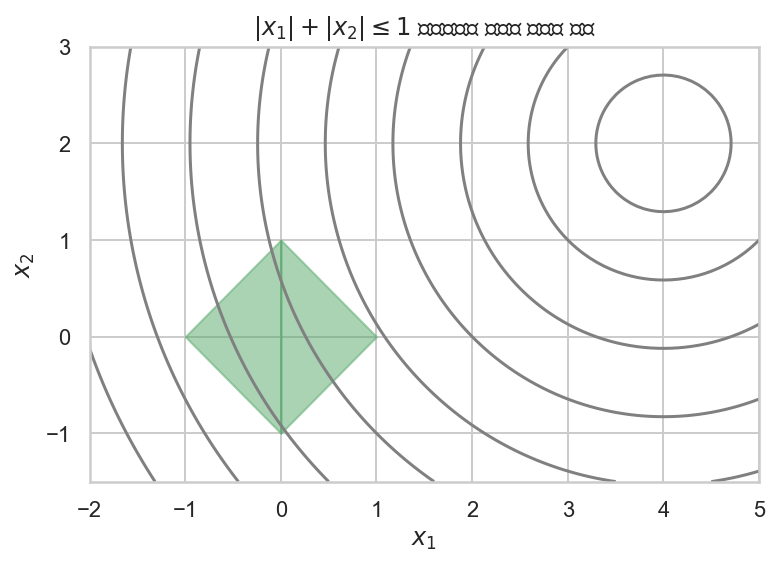

In [50]:
from functools import partial 
import matplotlib as mpl
import matplotlib.pylab as plt
 
def f2plt(x1, x2):     
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2) 
 
def f2(x):     
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2) 
 
def ieq_constraint2(x, k):     
    return np.atleast_1d(k - np.sum(np.abs(x))) 
 
def plot_opt(k):
    x1 = np.linspace(-2, 5, 100)     
    x2 = np.linspace(-1.5, 3, 100)     
    X1, X2 = np.meshgrid(x1, x2)     
    Y = f2plt(X1, X2) 
 
    plt.contour(X1, X2, Y, colors="gray",
                levels=np.arange(0.5, 5, 0.5) * np.sqrt(2)) 
 
    ax = plt.gca()     
    x12 = np.linspace(-k, 0, 10)     
    x13 = np.linspace(0, k, 10)     
    ax.fill_between(x12, x12 + k, -k - x12, color='g', alpha=0.5)     
    ax.fill_between(x13, x13 - k, k - x13, color='g', alpha=0.5) 
 
    # 최적점 위치     x_sol = sp.optimize.fmin_slsqp(f2, np.array([0, 0]),                                     ieqc ons=[partial(ieq_constraint2, k=k)], iprint=0)    plt.plot(x_sol[0], x_sol[1], 'ro', ms=20) 
 
    plt.xlim(-2, 5)     
    plt.ylim(-1.5, 3)     
    plt.xticks(np.linspace(-2, 5, 8))     
    plt.yticks(np.linspace(-1, 3, 5))     
    plt.xlabel("$x_1$")     
    plt.ylabel("$x_2$")     
    plt. title("$|x_1| + |x_2| \leq {}$ 제한조건을 가지는 최적화 문제" .format(k))    
    plt.show()
plot_opt(1)


Font 'default' does not have a glyph for '\uc81c' [U+c81c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud55c' [U+d55c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc870' [U+c870], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac74' [U+ac74], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc744' [U+c744], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac00' [U+ac00], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc9c0' [U+c9c0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub294' [U+b294], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd5c' [U+cd5c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc801' [U+c801], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud654' [U+d654], 

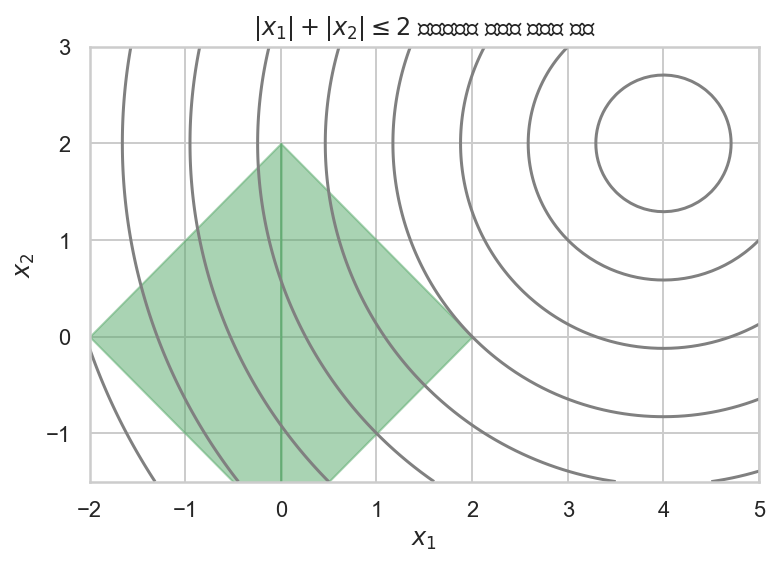

In [51]:
plot_opt(2)

Font 'default' does not have a glyph for '\uc81c' [U+c81c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud55c' [U+d55c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc870' [U+c870], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac74' [U+ac74], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc744' [U+c744], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac00' [U+ac00], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc9c0' [U+c9c0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub294' [U+b294], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd5c' [U+cd5c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc801' [U+c801], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud654' [U+d654], 

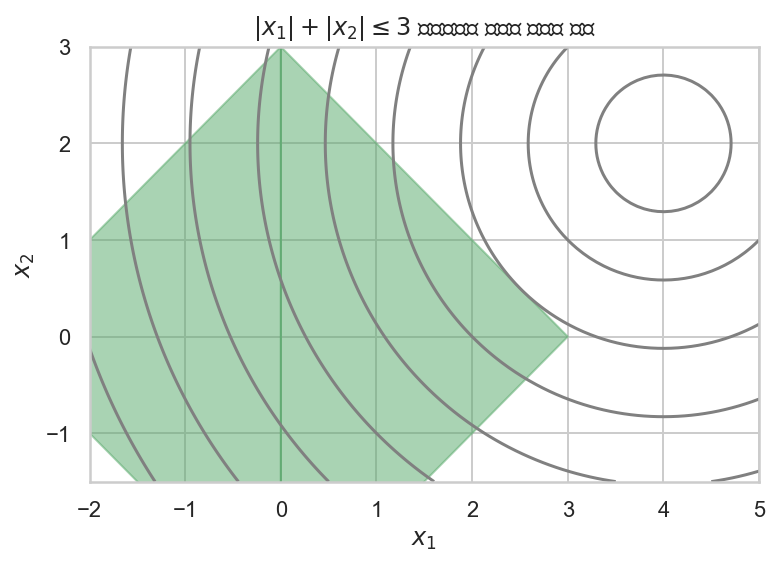

In [52]:
plot_opt(3)

Font 'default' does not have a glyph for '\uc81c' [U+c81c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud55c' [U+d55c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc870' [U+c870], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac74' [U+ac74], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc744' [U+c744], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac00' [U+ac00], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc9c0' [U+c9c0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub294' [U+b294], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd5c' [U+cd5c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc801' [U+c801], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud654' [U+d654], 

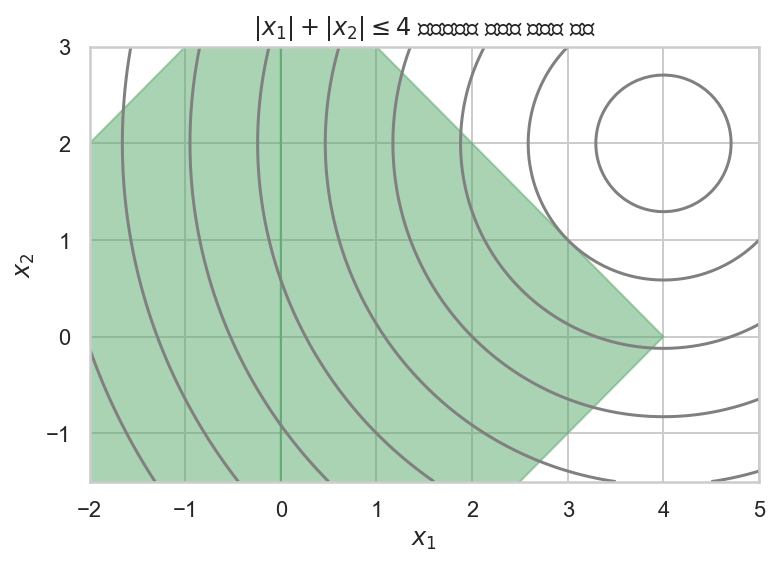

In [53]:
plot_opt(4)

Font 'default' does not have a glyph for '\uc81c' [U+c81c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud55c' [U+d55c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc870' [U+c870], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac74' [U+ac74], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc744' [U+c744], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac00' [U+ac00], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc9c0' [U+c9c0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub294' [U+b294], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd5c' [U+cd5c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc801' [U+c801], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud654' [U+d654], 

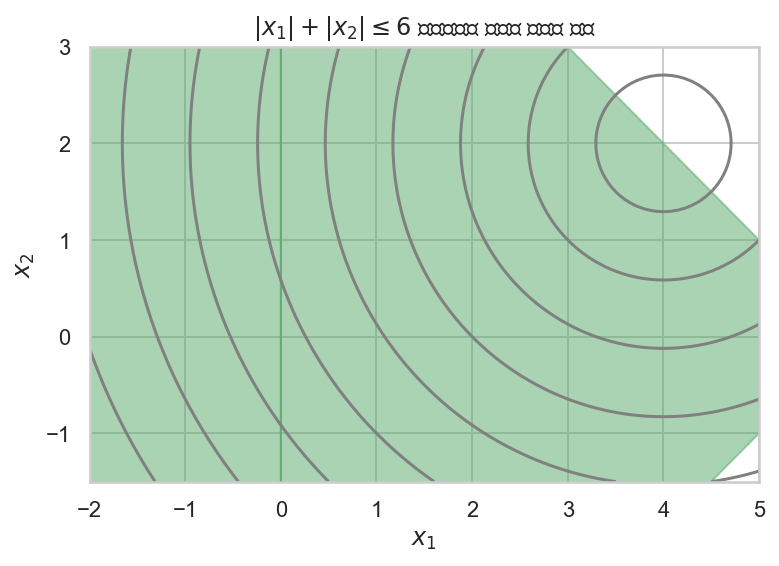

In [54]:
plot_opt(6)

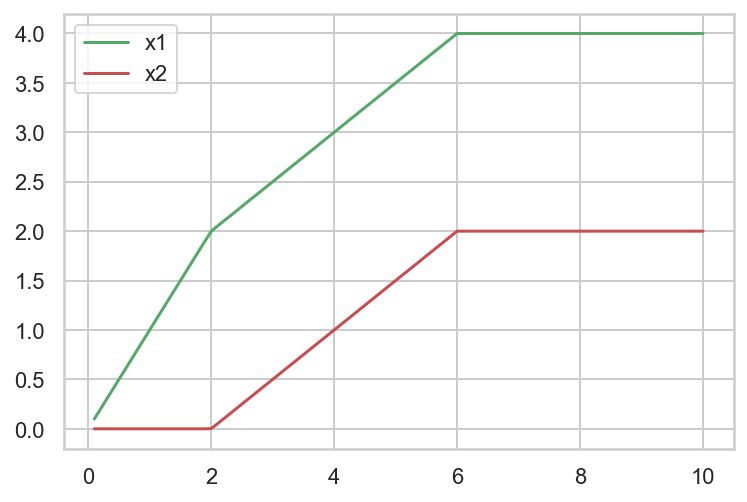

In [58]:
def ieq_constraint(k):     
    return lambda x: np.atleast_1d(k - np.sum(np.abs(x)))

opt=[]
k_range = np.linspace(0.1, 10, 100) 
for k in k_range: 
    opt += [ 
         sp.optimize.fmin_slsqp( 
             f2, np.array([0, 0]), ieqcons=[ieq_constraint(k)], iprint=0 
         )]
plt.plot(k_range, np.array(opt)[:, 0], 'g-',label="x1") 
plt.plot(k_range, np.array(opt)[:, 1], 'r-',label="x2") 
plt.legend()
plt.show()
             

In [1]:
#경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()